## Met Deze functie laad we het SQl Database in 

In [1]:
import pandas as pd
import seaborn as sns
import  numpy as np
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

def csv_to_database(csv, name):
    """
       Deze functie maakt een database van een csv bestand.
       Parameters:
                  csv  = Het csv bestand waar je een database van wil maken.
                         Zorg ervoor dat deze parameter een string is.
                         
                  name = De naam die je de database wil geven.
                         Zorg ervoor dat deze parameter een string is.
    """
    df = pd.read_csv(csv)
    df.to_sql(name, con=engine)
    
    return df

def show_query(query):
    """
       Deze functie print de output van je SQL query uit.
       Parameters:
                  query = Je SQL query.
                          Zorg ervoor dat deze parameter een string is.
    """
    query_output = engine.execute(query).fetchall()
    column_names = engine.execute(query)._metadata.keys
    return pd.DataFrame(query_output, columns = column_names)

In [2]:
import pandas as pd
import sqlite3

# Define database file path and output CSV file path
db_path = "database.sqlite"
csv_path = "data.csv"

# Connect to the SQLite database
conn = sqlite3.connect(db_path)

# Specify the table name to export (replace 'your_table_name' with the actual name)
table_name1 = "Country"
table_name2 = "League"
table_name3 = "Match"
table_name4 = "Player"
table_name5 = "Player_Attributes"
table_name6 = "Team"
table_name7 = "Team_Attributes"
table_name8 = "sqlite_sequence"

# Read data from the table into a Pandas DataFrame
df1 = pd.read_sql(f"SELECT * FROM {table_name1}", conn)
df2 = pd.read_sql(f"SELECT * FROM {table_name2}", conn)
df3 = pd.read_sql(f"SELECT * FROM {table_name3}", conn)
df4 = pd.read_sql(f"SELECT * FROM {table_name4}", conn)
df5 = pd.read_sql(f"SELECT * FROM {table_name5}", conn)
df6 = pd.read_sql(f"SELECT * FROM {table_name6}", conn)
df7 = pd.read_sql(f"SELECT * FROM {table_name7}", conn)
df8 = pd.read_sql(f"SELECT * FROM {table_name8}", conn)

# Close the connection to the database
conn.close()

# Save the DataFrame to a CSV file
df1.to_csv(csv_path, index=False)

print(f"Data from table '{table_name1}' exported to '{csv_path}'")


Data from table 'Country' exported to 'data.csv'


In [3]:
import pandas as pd
import sqlite3

# Define database file path and output CSV file path
db_path = "database.sqlite"
csv_path = "data.csv"

# Connect to the SQLite database
with sqlite3.connect(db_path) as conn:
    # Specify the table names to export
    table_names = ["Country", "League", "Match", "Player", "Player_Attributes", 
                   "Team", "Team_Attributes", "sqlite_sequence"]
    
    # Iterate over each table
    for table_name in table_names:
        # Read data from the table into a Pandas DataFrame
        df = pd.read_sql(f"SELECT * FROM {table_name}", conn)
        
        # Save the DataFrame to a CSV file
        df.to_csv(f"{table_name.lower()}.csv", index=False)
        
        print(f"Data from table '{table_name}' exported to '{table_name.lower()}.csv'")


Data from table 'Country' exported to 'country.csv'
Data from table 'League' exported to 'league.csv'
Data from table 'Match' exported to 'match.csv'
Data from table 'Player' exported to 'player.csv'
Data from table 'Player_Attributes' exported to 'player_attributes.csv'
Data from table 'Team' exported to 'team.csv'
Data from table 'Team_Attributes' exported to 'team_attributes.csv'
Data from table 'sqlite_sequence' exported to 'sqlite_sequence.csv'


## Hier hebben we het DataFrame df3 en df6 verwerkt ,we verwijderd alle missende waardes.
We hebben ook het DataFrame samen gevoegd tot een DataFrame.
We hebben een nieuwe column gemaakt 'year' vanuit het column 'date'.

In [4]:
d3 = df3.dropna()
d6 = df6.dropna()
df3_df6 = d3.merge(d6 , how = 'inner')
df3_df6['Year'] = pd.to_datetime(df3_df6['date']).dt.year

In [5]:
def update_standings(standings, team_id, points):
    if team_id not in standings['Team'].values:
        standings = standings.append({'Team': team_id, 'Points': points}, ignore_index=True)
    else:
        standings.loc[standings['Team'] == team_id, 'Points'] += points
    return standings


In [6]:
season = df3.merge(df6,how= 'left')
season_f = season.merge(pr_j, right_on='team_api_id_x', left_on ='team_api_id' , how= 'right')
season_f

NameError: name 'pr_j' is not defined

In [ ]:
pr_j = samen.merge(df3_df6,on = 'team_long_name', how= 'right' )
pr_j

,Team,Points,id_x,team_api_id_x,team_fifa_api_id_x,team_long_name,team_short_name_x,id_y,country_id,league_id,...,GBH,GBD,GBA,BSH,BSD,BSA,team_api_id_y,team_fifa_api_id_y,team_short_name_y,Year
0,10260.0,89.0,3457.0,10260.0,11.0,Manchester United,MUN,3457,1729,1729,...,2.30,3.40,3.00,2.20,3.40,3.10,10260,11.0,MUN,2013
1,10261.0,41.0,3458.0,10261.0,13.0,Newcastle United,NEW,3458,1729,1729,...,4.20,3.80,1.78,4.50,3.75,1.73,10261,13.0,NEW,2013
2,9825.0,73.0,3459.0,9825.0,1.0,Arsenal,ARS,3459,1729,1729,...,1.70,3.80,4.75,1.80,3.50,4.33,9825,1.0,ARS,2013
3,8659.0,49.0,3460.0,8659.0,109.0,West Bromwich Albion,WBA,3460,1729,1729,...,4.50,3.80,1.72,3.90,3.50,1.91,8659,109.0,WBA,2013
4,8472.0,39.0,3461.0,8472.0,106.0,Sunderland,SUN,3461,1729,1729,...,1.85,3.80,3.80,1.91,3.60,3.90,8472,106.0,SUN,2013
5,8650.0,61.0,3462.0,8650.0,9.0,Liverpool,LIV,3462,1729,1729,...,1.23,6.00,11.50,1.22,6.00,12.00,8650,9.0,LIV,2013
6,8654.0,46.0,3463.0,8654.0,19.0,West Ham United,WHU,3463,1729,1729,...,1.80,3.40,4.60,1.85,3.40,4.33,8654,19.0,WHU,2013
7,8528.0,36.0,3464.0,8528.0,1917.0,Wigan Athletic,WIG,3464,1729,1729,...,2.40,3.20,3.00,2.38,3.25,3.00,8528,1917.0,WIG,2013
8,10252.0,41.0,3465.0,10252.0,2.0,Aston Villa,AVL,3465,1729,1729,...,2.25,3.25,3.20,2.30,3.25,3.10,10252,2.0,AVL,2013
9,8456.0,78.0,3466.0,8456.0,10.0,Manchester City,MCI,3466,1729,1729,...,2.35,3.25,3.00,2.30,3.40,3.00,8456,10.0,MCI,2013


In [ ]:
from collections import defaultdict

def aantal_wedstrijden_per_seizoen(dataset):
    wedstrijden_per_team_seizoen = defaultdict(int)
    
    for wedstrijd in dataset:
        team = wedstrijd["team_long_name"]
        seizoen = wedstrijd["Year"]
        wedstrijden_per_team_seizoen[(team, seizoen)] += 1
    
    return wedstrijden_per_team_seizoen


# Bereken het aantal wedstrijden per team per seizoen
wedstrijden_per_team_seizoen = aantal_wedstrijden_per_seizoen(dataset=pr_j)
wedstrijden_per_team_seizoen

# Toon het resultaat
for (team, seizoen), aantal_wedstrijden in wedstrijden_per_team_seizoen.items():
print(f"{team} heeft {aantal_wedstrijden} wedstrijden gespeeld in seizoen {seizoen}.")


IndentationError: expected an indented block after 'for' statement on line 19 (422411239.py, line 20)

## Punten berekenen van elke team 
win = +3 
gelijk = +1 
gelijkspel en voor een nederlaag = 0 

In [ ]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

def update_standings(standings, team_id, points):
    if team_id not in standings.index:
        standings.loc[team_id] = {'Team': team_id, 'Points': 0}
    standings.at[team_id, 'Points'] += points
    return standings

season_2012_2013 = df3[df3['season'] == '2012/2013']

standings = pd.DataFrame(columns=['Team', 'Points'])
standings.set_index('Team', inplace=True)

for _, match in season_2012_2013.iterrows():
    home_team = match['home_team_api_id']
    away_team = match['away_team_api_id']
    home_goals = match['home_team_goal']
    away_goals = match['away_team_goal']

    if home_goals > away_goals:
        standings = update_standings(standings, home_team, 3)
        standings = update_standings(standings, away_team, 0)
    elif home_goals < away_goals:
        standings = update_standings(standings, away_team, 3)
        standings = update_standings(standings, home_team, 0)
    elif home_goals == away_goals:
        standings = update_standings(standings, home_team, 1)
        standings = update_standings(standings, away_team, 1)

standings = standings.sort_values(by='Points', ascending=False)

warnings.filterwarnings('default')

standings.reset_index(inplace=True)
samen = standings.merge(df6 ,left_on = 'Team' , right_on = 'team_api_id', how = 'left')
mask = samen.drop(columns=['Team','id','team_fifa_api_id','team_short_name'])

display(mask)



,Points,team_api_id,team_long_name
0,100,8634,FC Barcelona
1,91,9823,FC Bayern Munich
2,89,10260,Manchester United
3,87,9885,Juventus
4,85,8633,Real Madrid CF
...,...,...,...
181,23,9993,Beerschot AC
182,23,8525,Willem II
183,22,9878,Pescara
184,21,8357,SpVgg Greuther Fürth


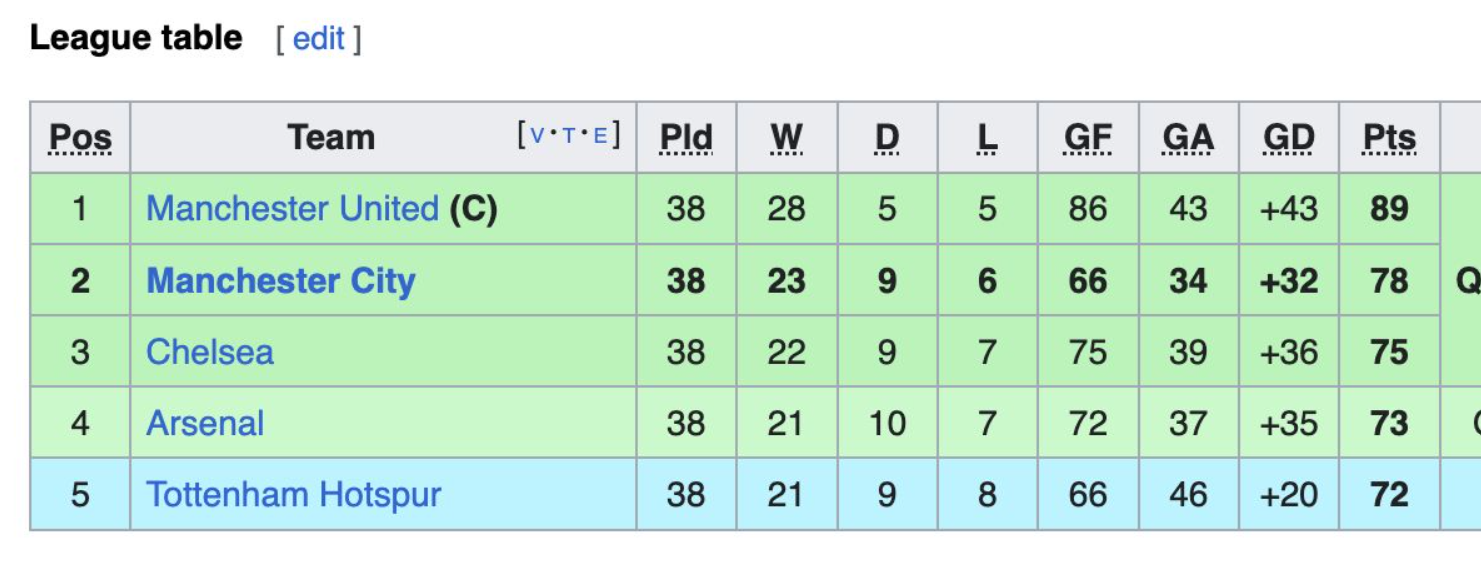


(Wikipedia contributors, 2024)

## Met deze functie kan je zien hoeveel goelpunten heeft elk team gescored in welke jaar


In [ ]:

import pandas as pd

def verschill(df, index_col='team_long_name', column_cols='Year', value_cols=['Points']):
  """
  Met deze functie krijgt je een overzicht van iedere teams in het seizoen van 2012 en 2013 het aantal goals gescored in  'home_team_goal', 'away_team_goal'

  Parameters:
  df: Het DataFrame dat je gaat gebruiken
  index_col: De kolom die gebruikt wordt als rij-index 
  column_cols : De kolom(men) om te gebruiken als kolomlabels.
  value_cols : De kolom(men) om te gebruiken als waarden.

  Return:
     Een pivot_table
  """

  pivot_table = df.pivot_table(index=index_col, columns=column_cols, values=value_cols)

  return pivot_table

func_result = verschill(pr_j)
func_result_f =func_result.fillna('_')
display(func_result_f)


Points      
Year                       2012  2013
team_long_name                       
AC Ajaccio                 42.0     _
Arsenal                       _  73.0
Aston Villa                   _  41.0
Chelsea                    75.0     _
Everton                       _  63.0
Fulham                     43.0     _
Liverpool                     _  61.0
Manchester City               _  78.0
Manchester United             _  89.0
Newcastle United              _  41.0
Reading                    28.0     _
Southampton                   _  41.0
Stoke City                 42.0     _
Sunderland                    _  39.0
Tottenham Hotspur          72.0     _
West Bromwich Albion          _  49.0
West Ham United               _  46.0
Wigan Athletic                _  36.0
Évian Thonon Gaillard FC   40.0     _

## De volgende functie laat alle thuis- en uitwedstrijd zien van de 2012-2013 seizoen waar Manchester City gespeeld heeft.

In [ ]:
teaminfo = df6[['team_long_name', 'team_api_id']].copy()

teaminfo.loc[teaminfo['team_long_name'] == 'Manchester City']

mcmatches = df3.loc[(df3['home_team_api_id'] == 8456) | (df3['away_team_api_id'] == 8456)]

mcmatches1213 = mcmatches.loc[mcmatches['season'] == '2012/2013']

mcmatches1213

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
3251,3252,1729,1729,2012/2013,1,2012-08-19 00:00:00,1228232,8456,8466,3,...,19.00,1.20,7.00,19.00,1.18,6.25,16.00,1.17,6.50,17.00
3267,3268,1729,1729,2012/2013,10,2012-11-03 00:00:00,1229206,8654,8456,0,...,1.73,5.20,4.00,1.73,5.00,3.80,1.65,4.50,3.75,1.73
3272,3273,1729,1729,2012/2013,11,2012-11-11 00:00:00,1229212,8456,8586,2,...,5.80,1.60,4.30,6.00,1.65,4.20,5.25,1.62,3.80,5.50
3281,3282,1729,1729,2012/2013,12,2012-11-17 00:00:00,1229221,8456,10252,5,...,15.00,1.20,7.50,15.00,1.22,6.50,10.50,1.22,6.00,12.00
3289,3290,1729,1729,2012/2013,13,2012-11-25 00:00:00,1229230,8455,8456,0,...,2.60,2.62,3.50,2.80,2.55,3.30,2.65,2.50,3.50,2.62
3305,3306,1729,1729,2012/2013,14,2012-11-28 00:00:00,1229246,8528,8456,0,...,1.53,7.00,4.40,1.53,6.00,4.00,1.53,6.00,4.00,1.53
3311,3312,1729,1729,2012/2013,15,2012-12-01 00:00:00,1229254,8456,8668,1,...,6.25,1.55,4.33,6.50,1.55,3.70,6.50,1.53,3.80,6.50
3322,3323,1729,1729,2012/2013,16,2012-12-09 00:00:00,1229267,8456,10260,2,...,3.20,2.30,3.60,3.30,2.15,3.30,3.30,2.25,3.30,3.20
3331,3332,1729,1729,2012/2013,17,2012-12-15 00:00:00,1229276,10261,8456,1,...,1.57,5.50,4.00,1.70,5.00,3.90,1.62,5.00,3.80,1.62
3340,3341,1729,1729,2012/2013,18,2012-12-22 00:00:00,1229286,8456,9798,1,...,17.00,1.17,8.50,20.00,1.15,8.00,14.00,1.12,8.50,17.00
